In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [4]:
opsd_daily=pd.read_csv("2012_2013_gc_customerID_11.csv", parse_dates=True)
weather=pd.read_csv("2012_2013_customerID_11.csv", parse_dates=True)

FileNotFoundError: [Errno 2] File 2012_2013_gc_customerID_11.csv does not exist: '2012_2013_gc_customerID_11.csv'

In [62]:
print(opsd_daily.shape)
print(weather.shape)

(17519, 2)
(17519, 15)


In [63]:
opsd_daily.head()

,date,value
0,2012-07-01 00:30:00,0.567
1,2012-07-01 01:00:00,0.547
2,2012-07-01 01:30:00,0.613
3,2012-07-01 02:00:00,0.519
4,2012-07-01 02:30:00,0.314


In [65]:
weather.head()

,zip_code,date,temperature,apparentTemperature,precipIntensity,precipProbability,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,uvIndex,cloudCover,visibility
0,2026,2012-07-01 00:30:00,10.77,10.77,0.0,0.0,5.48,0.70,1014.8,0.75,0.75,294,0,0.78,9.988
1,2026,2012-07-01 01:00:00,10.21,10.21,0.0,0.0,5.52,0.73,0.0,0.21,0.61,289,0,1.00,0.000
2,2026,2012-07-01 01:30:00,10.21,10.21,0.0,0.0,5.52,0.73,0.0,0.21,0.61,289,0,1.00,0.000
3,2026,2012-07-01 02:00:00,9.48,9.48,0.0,0.0,5.22,0.75,0.0,0.33,0.95,284,0,0.88,0.000
4,2026,2012-07-01 02:30:00,9.48,9.48,0.0,0.0,5.22,0.75,0.0,0.33,0.95,284,0,0.88,0.000


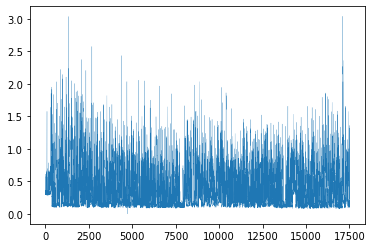

In [66]:
opsd_daily['value'].plot(linewidth=0.2);

In [9]:
# Add columns with year, month, and weekday name
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday Name'] = opsd_daily.index.day_name()
# Display a random sampling of 5 rows
opsd_daily.sample(5, random_state=0)

,value,Year,Month,Weekday Name
date,,,,
2012-11-28 07:00:00,0.152,2012,11,Wednesday
2013-01-20 05:00:00,0.127,2013,1,Sunday
2013-02-17 21:30:00,0.490,2013,2,Sunday
2012-12-27 19:00:00,1.306,2012,12,Thursday
2012-12-08 13:30:00,0.827,2012,12,Saturday


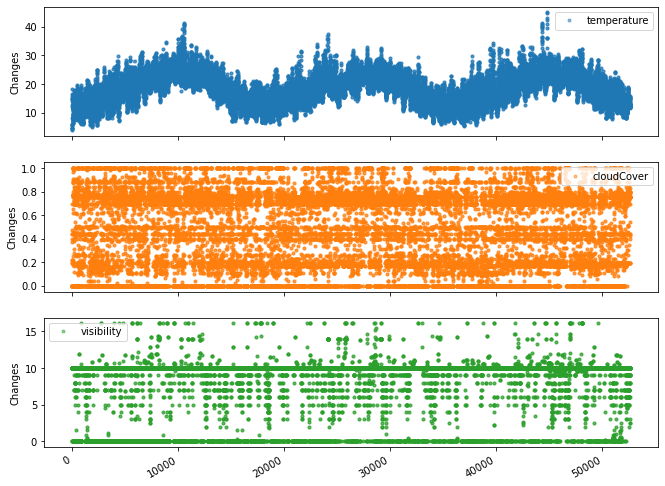

In [10]:
cols_plot = ['temperature', 'cloudCover', 'visibility']
axes = weather[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Changes')

In [67]:
weather.drop(columns=["zip_code"], inplace=True)

In [68]:
df=weather.merge(opsd_daily, on='date', how='left')

In [69]:
df.head()

,date,temperature,apparentTemperature,precipIntensity,precipProbability,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,uvIndex,cloudCover,visibility,value
0,2012-07-01 00:30:00,10.77,10.77,0.0,0.0,5.48,0.70,1014.8,0.75,0.75,294,0,0.78,9.988,0.567
1,2012-07-01 01:00:00,10.21,10.21,0.0,0.0,5.52,0.73,0.0,0.21,0.61,289,0,1.00,0.000,0.547
2,2012-07-01 01:30:00,10.21,10.21,0.0,0.0,5.52,0.73,0.0,0.21,0.61,289,0,1.00,0.000,0.613
3,2012-07-01 02:00:00,9.48,9.48,0.0,0.0,5.22,0.75,0.0,0.33,0.95,284,0,0.88,0.000,0.519
4,2012-07-01 02:30:00,9.48,9.48,0.0,0.0,5.22,0.75,0.0,0.33,0.95,284,0,0.88,0.000,0.314


In [70]:
df.set_index('date', inplace=True)

In [73]:
df = df.rename(columns={'value':'GC'})

In [74]:
df

,temperature,apparentTemperature,precipIntensity,precipProbability,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,uvIndex,cloudCover,visibility,GC
date,,,,,,,,,,,,,,
2012-07-01 00:30:00,10.77,10.77,0.0000,0.00,5.48,0.70,1014.8,0.75,0.75,294,0,0.78,9.988,0.567
2012-07-01 01:00:00,10.21,10.21,0.0000,0.00,5.52,0.73,0.0,0.21,0.61,289,0,1.00,0.000,0.547
2012-07-01 01:30:00,10.21,10.21,0.0000,0.00,5.52,0.73,0.0,0.21,0.61,289,0,1.00,0.000,0.613
2012-07-01 02:00:00,9.48,9.48,0.0000,0.00,5.22,0.75,0.0,0.33,0.95,284,0,0.88,0.000,0.519
2012-07-01 02:30:00,9.48,9.48,0.0000,0.00,5.22,0.75,0.0,0.33,0.95,284,0,0.88,0.000,0.314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-06-30 21:30:00,12.70,12.70,0.0713,0.31,11.49,0.92,1024.7,1.48,1.74,237,0,0.42,10.003,0.404
2013-06-30 22:00:00,12.21,12.21,0.0056,0.04,11.12,0.93,1024.7,1.42,2.11,248,0,0.40,10.003,0.747
2013-06-30 22:30:00,12.21,12.21,0.0056,0.04,11.12,0.93,1024.7,1.42,2.11,248,0,0.40,10.003,0.656


In [75]:
df.isna().sum()

temperature            0
apparentTemperature    0
precipIntensity        0
precipProbability      0
dewPoint               0
humidity               0
pressure               0
windSpeed              0
windGust               0
windBearing            0
uvIndex                0
cloudCover             0
visibility             0
GC                     0
dtype: int64

In [76]:
#Export into CSV
# df.to_csv("2012_2013_merged_customerID_11.csv")

## Modeling data

In [57]:
data = pd.read_csv("2012_2013_merged_customerID_11.csv", parse_dates=True)
data.head()   

,date,temperature,apparentTemperature,precipIntensity,precipProbability,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,uvIndex,cloudCover,visibility,GC
0,2012-07-01 00:30:00,10.77,10.77,0.0,0.0,5.48,0.70,1014.8,0.75,0.75,294,0,0.78,9.988,0.567
1,2012-07-01 01:00:00,10.21,10.21,0.0,0.0,5.52,0.73,0.0,0.21,0.61,289,0,1.00,0.000,0.547
2,2012-07-01 01:30:00,10.21,10.21,0.0,0.0,5.52,0.73,0.0,0.21,0.61,289,0,1.00,0.000,0.613
3,2012-07-01 02:00:00,9.48,9.48,0.0,0.0,5.22,0.75,0.0,0.33,0.95,284,0,0.88,0.000,0.519
4,2012-07-01 02:30:00,9.48,9.48,0.0,0.0,5.22,0.75,0.0,0.33,0.95,284,0,0.88,0.000,0.314


In [58]:
data.shape

(17519, 15)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17519 entries, 0 to 17518
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 17519 non-null  object 
 1   temperature          17519 non-null  float64
 2   apparentTemperature  17519 non-null  float64
 3   precipIntensity      17519 non-null  float64
 4   precipProbability    17519 non-null  float64
 5   dewPoint             17519 non-null  float64
 6   humidity             17519 non-null  float64
 7   pressure             17519 non-null  float64
 8   windSpeed            17519 non-null  float64
 9   windGust             17519 non-null  float64
 10  windBearing          17519 non-null  int64  
 11  uvIndex              17519 non-null  int64  
 12  cloudCover           17519 non-null  float64
 13  visibility           17519 non-null  float64
 14  GC                   17519 non-null  float64
dtypes: float64(12), int64(2), object(1)


In [60]:
data.describe()

,temperature,apparentTemperature,precipIntensity,precipProbability,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,uvIndex,cloudCover,visibility,GC
count,17519.000000,17519.000000,17519.000000,17519.000000,17519.000000,17519.000000,17519.000000,17519.000000,17519.000000,17519.000000,17519.000000,17519.000000,17519.000000,17519.000000
mean,18.238086,18.263778,0.148884,0.090582,10.632642,0.633191,693.195685,3.031962,3.982912,187.306353,1.323021,0.410460,9.159643,0.378978
std,5.169058,5.420163,0.746891,0.209576,4.487537,0.154058,474.068234,1.828641,2.662952,105.758293,2.289687,0.329261,2.645959,0.322044
min,5.450000,2.990000,0.000000,0.000000,-4.400000,0.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.370000,14.370000,0.000000,0.000000,7.740000,0.530000,0.000000,1.570000,2.000000,93.000000,0.000000,0.040000,9.988000,0.146000
50%,18.290000,18.310000,0.000000,0.000000,10.870000,0.630000,1013.500000,2.750000,3.540000,191.000000,0.000000,0.400000,10.003000,0.245000
75%,21.710000,21.760000,0.021300,0.060000,13.620000,0.720000,1019.500000,4.230000,5.320000,283.000000,2.000000,0.750000,10.003000,0.523000
max,45.000000,45.670000,31.415000,1.000000,23.850000,0.960000,1033.500000,11.490000,20.720000,359.000000,12.000000,1.000000,16.093000,3.042000


### To verify missing value percentage

In [61]:
100 * data.isnull().sum() / data.shape[0]

date                   0.0
temperature            0.0
apparentTemperature    0.0
precipIntensity        0.0
precipProbability      0.0
dewPoint               0.0
humidity               0.0
pressure               0.0
windSpeed              0.0
windGust               0.0
windBearing            0.0
uvIndex                0.0
cloudCover             0.0
visibility             0.0
GC                     0.0
dtype: float64

Every thing is ok, there is no missing value

In [62]:
data["date"] = pd.to_datetime(data["date"])
data["date"]

0       2012-07-01 00:30:00
1       2012-07-01 01:00:00
2       2012-07-01 01:30:00
3       2012-07-01 02:00:00
4       2012-07-01 02:30:00
                ...        
17514   2013-06-30 21:30:00
17515   2013-06-30 22:00:00
17516   2013-06-30 22:30:00
17517   2013-06-30 23:00:00
17518   2013-06-30 23:30:00
Name: date, Length: 17519, dtype: datetime64[ns]

In [63]:
data = data.iloc[:, 1:]
data.head()

,temperature,apparentTemperature,precipIntensity,precipProbability,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,uvIndex,cloudCover,visibility,GC
0,10.77,10.77,0.0,0.0,5.48,0.70,1014.8,0.75,0.75,294,0,0.78,9.988,0.567
1,10.21,10.21,0.0,0.0,5.52,0.73,0.0,0.21,0.61,289,0,1.00,0.000,0.547
2,10.21,10.21,0.0,0.0,5.52,0.73,0.0,0.21,0.61,289,0,1.00,0.000,0.613
3,9.48,9.48,0.0,0.0,5.22,0.75,0.0,0.33,0.95,284,0,0.88,0.000,0.519
4,9.48,9.48,0.0,0.0,5.22,0.75,0.0,0.33,0.95,284,0,0.88,0.000,0.314


In [64]:
# Separate target variable Y from features X

target_name = 'GC'


Y = data[target_name]
X = data.drop(target_name, axis=1)

In [65]:
# # Convert pandas DataFrames to numpy arrays before using scikit-learn
# print("Convert pandas DataFrames to numpy arrays...")
# X = X.values
# Y = Y.tolist()
# print("...Done")
# print(X[0:5,:])
# print()
# print(Y[0:5])

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [67]:
# Data normalization

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = pd.DataFrame(sc_x.fit_transform(X_train), columns = X_train.columns, index= X_train.index)
display(X_train)

#sc_x.fit(X_train)
#X_train= sc_x.transform(X_train)

print("-------------")
X_test = pd.DataFrame(sc_x.transform(X_test), columns = X_test.columns, index=X_test.index)
display(X_test)

,temperature,apparentTemperature,precipIntensity,precipProbability,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,uvIndex,cloudCover,visibility
16461,-0.880327,-0.843948,-0.208208,-0.431844,0.063654,1.278921,-1.462639,-1.441257,-1.342753,0.557275,-0.576862,-1.241389,0.314620
11314,1.346864,1.279419,-0.077331,-0.142982,0.696646,-0.934917,0.683240,1.142943,0.635672,-0.540280,-0.142667,-0.026164,0.914066
12274,1.372041,1.303423,-0.208208,-0.431844,0.613887,-1.000030,0.666574,2.020804,3.180969,-1.353984,-0.576862,-1.241389,0.314620
8187,1.542469,1.488063,-0.182940,0.097737,1.313981,-0.544240,0.666152,0.775340,0.459228,-0.937670,2.896704,-0.694538,0.320254
7757,0.246825,0.230661,-0.188085,0.001450,0.540075,0.172002,-1.462639,3.172995,4.314716,-0.095581,1.159921,1.037157,0.320254
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16398,0.587682,0.555628,-0.208208,-0.431844,0.569153,-0.218675,0.686404,0.122431,0.147635,0.311271,-0.142667,0.976396,0.314620
4633,2.987238,2.843325,-0.208208,-0.431844,-0.338956,-2.692965,-1.462639,-0.278093,0.474244,0.462658,2.896704,-1.241389,-3.436798
10644,1.356547,1.327426,-0.208208,-0.431844,1.566730,-0.023337,-1.462639,0.468088,0.541819,-1.448601,-0.576862,-1.241389,0.314620
5214,0.401760,0.378373,-0.208208,-0.431844,-0.294221,-0.934917,-1.462639,0.276057,0.151389,-0.644358,-0.576862,-1.241389,0.314620


-------------


,temperature,apparentTemperature,precipIntensity,precipProbability,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,uvIndex,cloudCover,visibility
10772,1.900757,1.807491,-0.208208,-0.431844,-0.023578,-1.911611,0.679232,0.281543,-0.163957,-0.388893,-0.576862,-1.241389,0.314620
10232,0.419191,0.394991,-0.208208,-0.431844,-0.542497,-1.195369,0.673114,-0.453665,-0.468041,-0.256429,-0.576862,1.037157,0.320254
3249,1.470812,1.397589,-0.208208,-0.431844,-3.360765,-3.278981,-1.462639,1.302056,0.969789,0.945204,-0.576862,-1.241389,0.314620
1581,-1.405169,-1.344324,-0.208208,-0.431844,-1.168779,0.367341,-1.462639,-0.700563,-0.835946,1.020897,-0.576862,-1.241389,-3.436798
1596,-2.090757,-2.149357,-0.208208,-0.431844,-1.674278,0.692905,0.682818,-0.782862,-0.832192,1.219592,-0.576862,-1.241389,-3.436798
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11244,0.576062,0.544550,0.144327,1.590194,-0.171202,-1.000030,-1.462639,-0.810295,-0.873487,0.216655,-0.576862,0.095358,0.320254
2391,-0.888074,-0.851333,-0.208208,-0.431844,-1.025629,-0.218675,-1.462639,-0.173847,-0.362926,0.585660,-0.576862,0.095358,0.320254
13223,1.232599,1.170481,-0.208208,-0.431844,0.278379,-1.195369,-1.462639,-0.162874,-0.126416,-0.057734,-0.576862,-1.241389,0.314620
7692,0.161611,0.149419,-0.208208,-0.431844,0.551259,0.302228,-1.462639,-0.936488,-0.918537,1.011436,-0.576862,1.037157,0.320254


### Stat model

In [68]:
import statsmodels.api as sm

model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     GC   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     91.43
Date:                Fri, 21 Aug 2020   Prob (F-statistic):          7.49e-236
Time:                        16:46:31   Log-Likelihood:                -3444.4
No. Observations:               14015   AIC:                             6917.
Df Residuals:                   14001   BIC:                             7022.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3792      0.003    145.027      0.000       0.374       0.384
temperature            -0.2370      0.038     -6.166      0.000      -0.312      -0.162
apparentTemperature     0.2197      0.037      6.007      0.000       0.148       0.291
precipIntensity        -0.0010      0.003     -0.309      0.758      -0.007       0.005
precipProbability       0.0092      0.004      2.593      0.010       0.002       0.016
dewPoint               -0.0064      0.014     -0.467      0.641      -0.033       0.021
humidity               -0.0223      0.012     -1.791      0.073      -0.047       0.002
pressure               -0.0038      0.003     -1.434      0.152      -0.009       0.001
windSpeed              -0.0123      0.008     -1.504      0.133      -0.028       0.004
windGust                0.0410      0.008      5.167      0.000       0.025       0.057
windBearing            -0.0680      0.003    -21.306      0.000      -0.074      -0.062
uvIndex                -0.0623      0.003    -20.423      0.000      -0.068      -0.056
cloudCover             -0.0025      0.003     -0.860      0.390      -0.008       0.003
visibility             -0.0102      0.003     -3.727      0.000      -0.016      -0.005
==============================================================================
Omnibus:                     4870.959   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17872.655
Skew:                           1.736   Prob(JB):                         0.00
Kurtosis:                       7.308   Cond. No.                         37.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Linear Regression Model

In [77]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
print(" ")

print("Train score : {}".format(regressor.score(X_train, Y_train)))
print(" ")
print("Test score : {}".format(regressor.score(X_test, Y_test)))

 
Train score : 0.07825254584001184
 
Test score : 0.0770097622465914


### RandomForest Model

In [92]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [93]:
print(" ")

print("RF_train score : {}".format(rf_regressor.score(X_train, Y_train)))
print(" ")
print("RF_test score : {}".format(rf_regressor.score(X_test, Y_test)))

 
RF_train score : 0.8713726710098733
 
RF_test score : 0.5430594553310808


In [94]:
from sklearn.model_selection import GridSearchCV
rf_regressor_grid = RandomForestRegressor()
params = {"n_estimators": range(10, 30, 5),
          "max_depth" : range(1,5),
          "max_features" : range(3, 6)
          }

regressor = GridSearchCV(cv=10, estimator = rf_regressor_grid, param_grid = params, n_jobs=-1, verbose=3).fit(X_train, Y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.1min finished


In [95]:
regressor.best_params_

{'max_depth': 4, 'max_features': 5, 'n_estimators': 25}

In [96]:
regressor.best_estimator_.score(X_train, Y_train)

0.1333999844308924

In [97]:
regressor.best_estimator_.score(X_test, Y_test)

0.12023396347683868

### XGboost Model 